In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import splat

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
You are currently using version 2023.11.30

If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
splat.VERSION

'2023.11.30'

In [4]:
df = pd.read_csv('train_variablenoise.csv')
test_data = pd.read_csv('test.standardspt_removedoutliers85-245.csv')

In [5]:
test = test_data.copy()

In [6]:
wav_002 = [(0.81,0.83),
                       (0.83,0.85),(0.85, 0.87),(0.87, 0.89),(0.89, 0.91),(0.91, 0.93),(0.93, 0.95),(0.95, 0.97),(0.97, 0.99),(0.99, 1.01),
                       (1.01, 1.03),(1.03, 1.05),(1.05, 1.07),(1.07, 1.09),(1.09, 1.11), (1.11, 1.13),(1.13,1.15),(1.15, 1.17),
                       (1.17, 1.19),(1.19, 1.21),(1.21, 1.23),(1.23, 1.25),(1.25, 1.27),(1.27, 1.29),(1.29, 1.31),(1.31, 1.33),
                      (1.42,1.44),(1.44,1.46),(1.46,1.48),(1.48,1.50),(1.50,1.52), (1.52,1.54),(1.54,1.56),(1.56,1.58),
                       (1.58,1.60),(1.60,1.62),(1.62,1.64),(1.64,1.66),(1.66,1.68),(1.68,1.7),(1.7,1.72),(1.72,1.74),(1.74,1.76),
                       (1.76,1.78),(1.78,1.80),(1.95,1.97),(1.97,1.99),(2.01,2.03),(2.03,2.05),(2.05,2.07),(2.07,2.09),
                       (2.09,2.11),(2.11,2.13),(2.13,2.15),(2.15,2.17),(2.17,2.19),(2.19,2.21),(2.21,2.23),(2.23,2.25),(2.25,2.27),
                       (2.27,2.29),(2.29,2.31),(2.31,2.33),(2.33,2.35),(2.35,2.37),(2.37,2.39),(2.39,2.41),(2.41,2.43),(2.43,2.45)]
wav_002_str = [str(tup) for tup in wav_002] + ['spectral_type']

# Filter DataFrame columns based on this new list
test = test[wav_002_str]
df = df[wav_002_str]

In [9]:
test.shape, df.shape

((316, 70), (2400, 70))

In [10]:
def remove_dot_zero(s):
    return s[:-2] if s[-2:] == '.0' else s

In [11]:
df['spectral_type'] = [remove_dot_zero(s) for s in df['spectral_type']]
test['spectral_type'] = [remove_dot_zero(s) for s in test['spectral_type']]

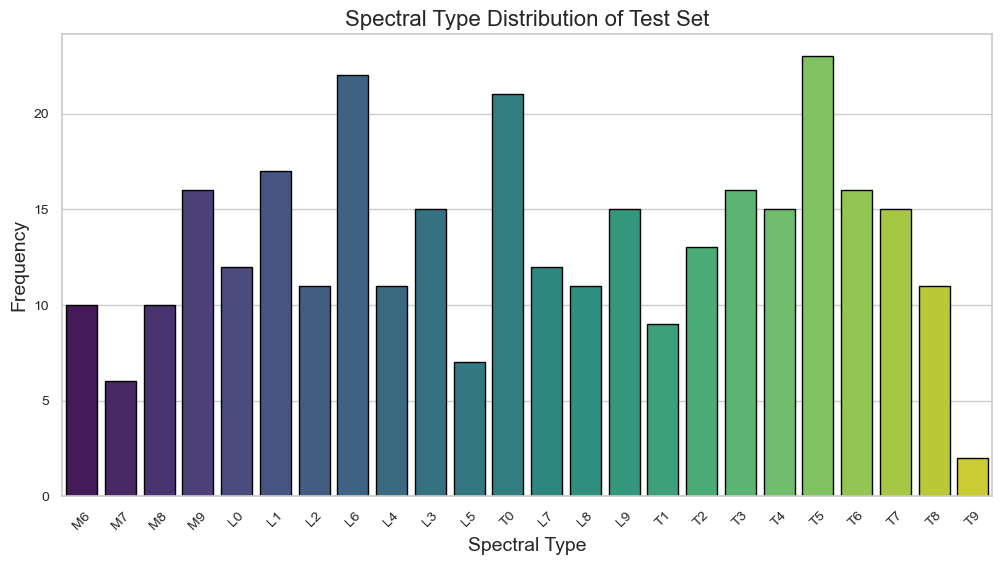

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set seaborn style
sns.set(style="whitegrid")

counted_spectral_types = Counter(test['spectral_type'])

plt.figure(figsize=(12, 6))

# Plot the histogram with custom colors and edge color
ax = sns.barplot(x=list(counted_spectral_types.keys()), y=list(counted_spectral_types.values()), palette="viridis", edgecolor="black")

# Customize the plot labels and title
plt.xlabel("Spectral Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Spectral Type Distribution of Test Set", fontsize=16)

# Customize the ticks
ax.tick_params(axis="x", labelsize=10, rotation=45)
ax.tick_params(axis="y", labelsize=10)

# Display the plot
plt.show()

In [15]:
y = df.spectral_type # we are predicting SpT

df_features = df.columns[:-1]
X = df[df_features]

In [18]:
test.isnull().sum()
test.dropna(inplace=True)

In [19]:
test_X = test[df_features]
test_y = test['spectral_type']

In [20]:
train_X = X
train_y = y

In [21]:
import time

forest_model = RandomForestClassifier(n_estimators=300,max_depth = None, min_samples_split = 2,
                                      min_samples_leaf = 1, max_features ='sqrt', max_leaf_nodes = None, 
                                      bootstrap = True,random_state=42)
start_time = time.time()

forest_model.fit(X, train_y)

rf_training_time = time.time() - start_time

y_preds = forest_model.predict(test_X)

print(accuracy_score(test_y , y_preds))
print(f"Random Forest training time: {rf_training_time:.3f} seconds")

0.8
Random Forest training time: 5.104 seconds


In [22]:
def spectral_type_accuracy(y_true, y_pred):
    """
    Calculates the accuracy of a spectral type classification model with plus minus 1 spectral type uncertainty.

    Args:
    y_true (array-like): True spectral types of the data in string format (e.g. 'M0', 'L1', etc.).
    y_pred (array-like): Predicted spectral types of the data in string format.

    Returns:
    accuracy (float): Accuracy of the model with plus minus 1 spectral type uncertainty.
    """
    # Define a dictionary that maps each spectral type string to an integer value
    type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}
    # Initialize the count of correct predictions to 0
    correct_predictions = 0

    # Iterate over the true and predicted spectral types
    for true_type, pred_type in zip(y_true, y_pred):
        
        # Convert the spectral type strings to integers using the type_to_int dictionary
        true_type_int = type_to_int[true_type]
        pred_type_int = type_to_int[pred_type]
        
        # Check if the predicted spectral type is within plus minus 1 spectral type of the true spectral type
        if (pred_type_int >= true_type_int - 1) and (pred_type_int <= true_type_int + 1):
            
            # Increment the count of correct predictions
            correct_predictions += 1
    
    # Calculate the accuracy as the ratio of correct predictions to the total number of predictions
    accuracy = correct_predictions / len(y_true)

    return accuracy

In [23]:
spectral_type_accuracy(test_y,y_preds)

0.9555555555555556

In [24]:
feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=False)
feature_df = pd.DataFrame(list(feature_scores.items()), columns=['Wavelength_Interval', 'Importance'])
feature_df['Wavelength_Interval'] = feature_df['Wavelength_Interval'].apply(lambda x: tuple(map(float, x.strip('()').split(', '))))

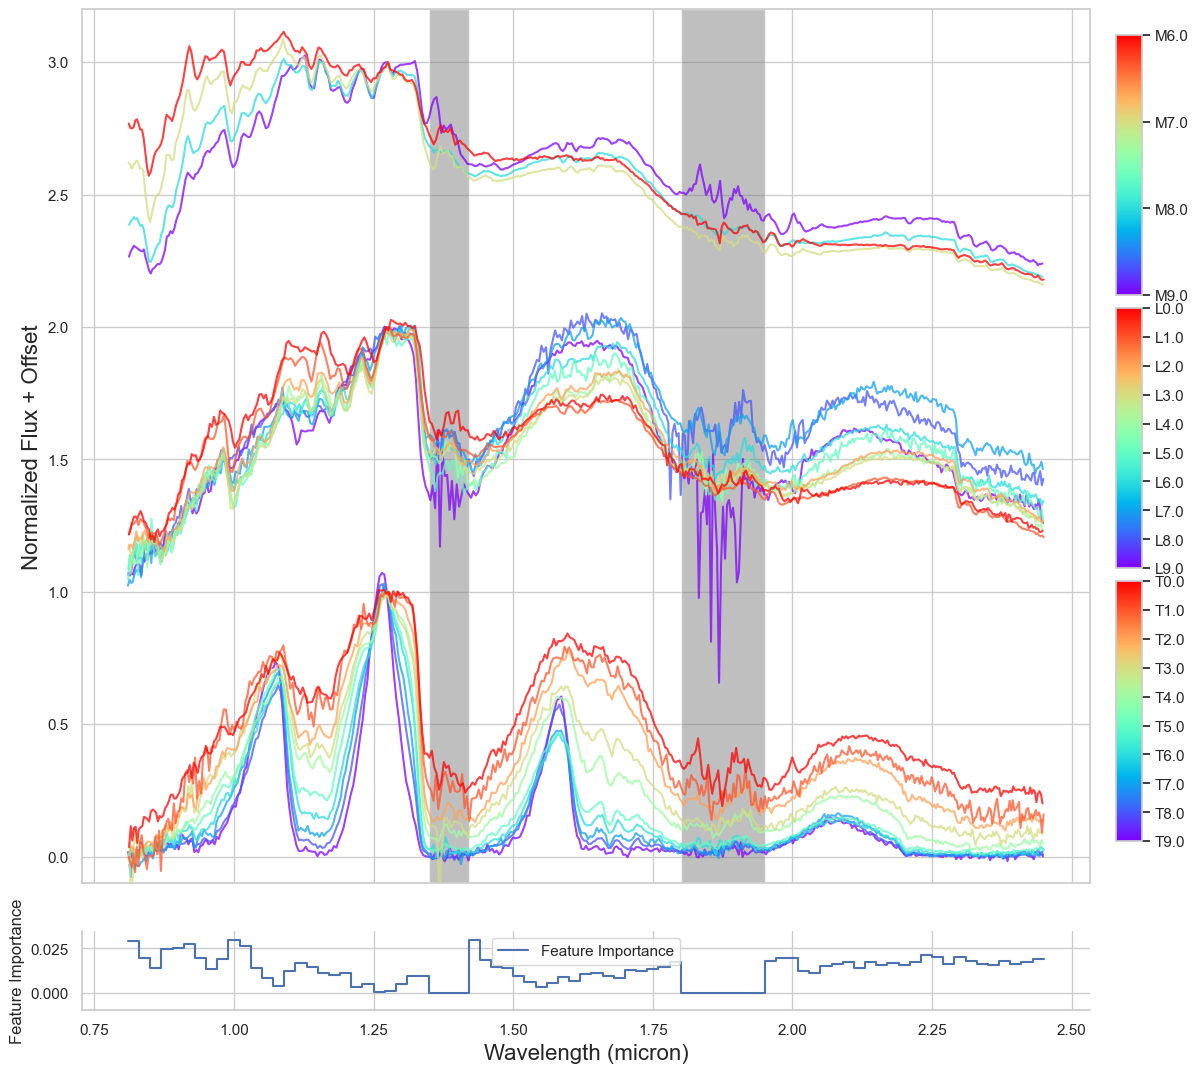

In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines
def add_row(df, row_dict):
    return pd.concat([df, pd.DataFrame([row_dict])], ignore_index=True)

# Manually add the intervals with zero importance
rows_to_add = [
    {'Wavelength_Interval': '(1.35, 1.37)', 'Importance': 0},
    {'Wavelength_Interval': '(1.37, 1.39)', 'Importance': 0},
{'Wavelength_Interval': '(1.35, 1.37)', 'Importance': 0},
{'Wavelength_Interval': '(1.37, 1.39)', 'Importance': 0},
{'Wavelength_Interval': '(1.39, 1.42)', 'Importance': 0},
{'Wavelength_Interval': '(1.8, 1.82)', 'Importance': 0},
{'Wavelength_Interval': '(1.82, 1.84)', 'Importance': 0},
{'Wavelength_Interval': '(1.84, 1.86)', 'Importance': 0},
{'Wavelength_Interval': '(1.86, 1.88)', 'Importance': 0},
{'Wavelength_Interval': '(1.88, 1.9)', 'Importance': 0},
{'Wavelength_Interval': '(1.9, 1.92)', 'Importance': 0},
{'Wavelength_Interval': '(1.92, 1.94)', 'Importance': 0},
{'Wavelength_Interval': '(1.94, 1.95)', 'Importance': 0}]

for row in rows_to_add:
    feature_df = add_row(feature_df, row)

normal_list = ['M6.0', 'M7.0', 'M8.0', 'M9.0', 'L0.0', 'L1.0', 'L2.0', 'L3.0', 'L4.0',
                  'L5.0', 'L6.0', 'L7.0', 'L8.0', 'L9.0', 'T0.0', 'T1.0', 'T2.0', 'T3.0', 'T4.0', 'T5.0', 'T6.0', 'T7.0',
               'T8.0', 'T9.0']

M_list = ['M6.0', 'M7.0', 'M8.0', 'M9.0']

L_list = ['L0.0', 'L1.0', 'L2.0', 'L3.0', 'L4.0','L5.0', 'L6.0', 'L7.0', 'L8.0', 'L9.0']

T_list = ['T0.0', 'T1.0', 'T2.0', 'T3.0', 'T4.0', 'T5.0', 'T6.0', 'T7.0','T8.0', 'T9.0']


# Sort the dataframe by the Wavelength_Interval
feature_df['Wavelength_Interval'] = feature_df['Wavelength_Interval'].apply(
    lambda x: tuple(map(float, x.strip('()').split(', '))) if isinstance(x, str) else x
)
feature_df_sorted = feature_df.sort_values('Wavelength_Interval')

rect_wavelengths = []
rect_importances = []
for index, row in feature_df_sorted.iterrows():
    wv_start, wv_end = row['Wavelength_Interval']
    importance = row['Importance']
    rect_wavelengths.extend([wv_start, wv_end])
    rect_importances.extend([importance, importance])
    
def Plot_Feature_Importance():
    offset_mapping = {"M": 2, "L": 1, "T": 0}

    fig, axs = plt.subplots(2, 1, figsize=(13, 13), gridspec_kw={'height_ratios': [11, 1], 'hspace': 0.1}, sharex=True)

    all_dwarfs = {
        "M": M_list,
        "L": L_list,
        "T": T_list
    }

    # Define the position and size for each color bar explicitly
    colorbar_configs = {
        "M": [0.92, 0.66, 0.02, 0.20], # Example: [left, bottom, width, height]
        "L": [0.92, 0.45, 0.02, 0.20], # Adjust these values as needed
        "T": [0.92, 0.24, 0.02, 0.20]  # Different size or position for the T dwarfs color bar
    }

    for i, (dwarf_type, dwarf_list) in enumerate(all_dwarfs.items()):
        offset = offset_mapping[dwarf_type]
        dwarf_list = dwarf_list[::-1]

        # Color map
        norm = plt.Normalize(0, len(dwarf_list)-1)
        colors = cm.rainbow(norm(np.arange(len(dwarf_list))))

        # Plot spectra
        for idx, spt in enumerate(dwarf_list):
            standard = splat.getStandard(spt=spt)
            standard.normalize([1.27,1.28])
            wavelengths2 = standard.wave.value[(standard.wave.value >= 0.81) & (standard.wave.value <= 2.45)]
            flux = standard.flux.value[(standard.wave.value >= 0.81) & (standard.wave.value <= 2.45)] + offset
            axs[0].plot(wavelengths2, flux, color=colors[idx], alpha=0.75)

        # Use a specific color bar configuration for each spectral type
        cbar_config = colorbar_configs[dwarf_type]
        cax = fig.add_axes(cbar_config)
        sm = plt.cm.ScalarMappable(cmap=cm.rainbow, norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
        cbar.set_ticks(np.arange(len(dwarf_list)))
        cbar.set_ticklabels(dwarf_list)

    axs[0].axvspan(1.35, 1.42, facecolor='grey', alpha=0.5)
    axs[0].axvspan(1.8, 1.95, facecolor='grey', alpha=0.5)
    axs[0].set_ylim([-0.1,3.2])
    axs[0].grid(True)
    axs[0].set_ylabel("Normalized Flux + Offset", fontsize=16)

    axs[1].step(rect_wavelengths, rect_importances, where="post", label="Feature Importance")
    axs[1].set_xlabel("Wavelength (micron)", fontsize=16)
    axs[1].set_ylabel("Feature Importance", fontsize=12)
    axs[1].legend(loc='upper center')
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].set_ylim([-0.01,0.035])

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig('feature_importance_spectra.pdf')
    plt.show()

Plot_Feature_Importance()

# k-Nearest Neighbors

In [30]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

start_time = time.time()

knn.fit(train_X, train_y)

knn_training_time = time.time() - start_time

Y_pred = knn.predict(test_X)

train_accuracy_knn = round(knn.score(train_X, train_y) * 100, 2)
test_accuracy_knn = round(knn.score(test_X, test_y) * 100, 2)

print(train_accuracy_knn ,test_accuracy_knn)
print(f"kNN training time: {knn_training_time:.3f} seconds")

100.0 84.13
kNN training time: 0.002 seconds


In [31]:
spectral_type_accuracy(test_y,Y_pred)

0.9841269841269841

In [32]:
spectral_type_importances = forest_model.feature_importances_
feature_scores = pd.Series(spectral_type_importances, index=X.columns).sort_values(ascending=False)
feature_df = pd.DataFrame(list(feature_scores.items()), columns=['Wavelength_Interval', 'Importance'])
feature_df['Wavelength_Interval'] = feature_df['Wavelength_Interval'].apply(lambda x: tuple(map(float, x.strip('()').split(', '))))

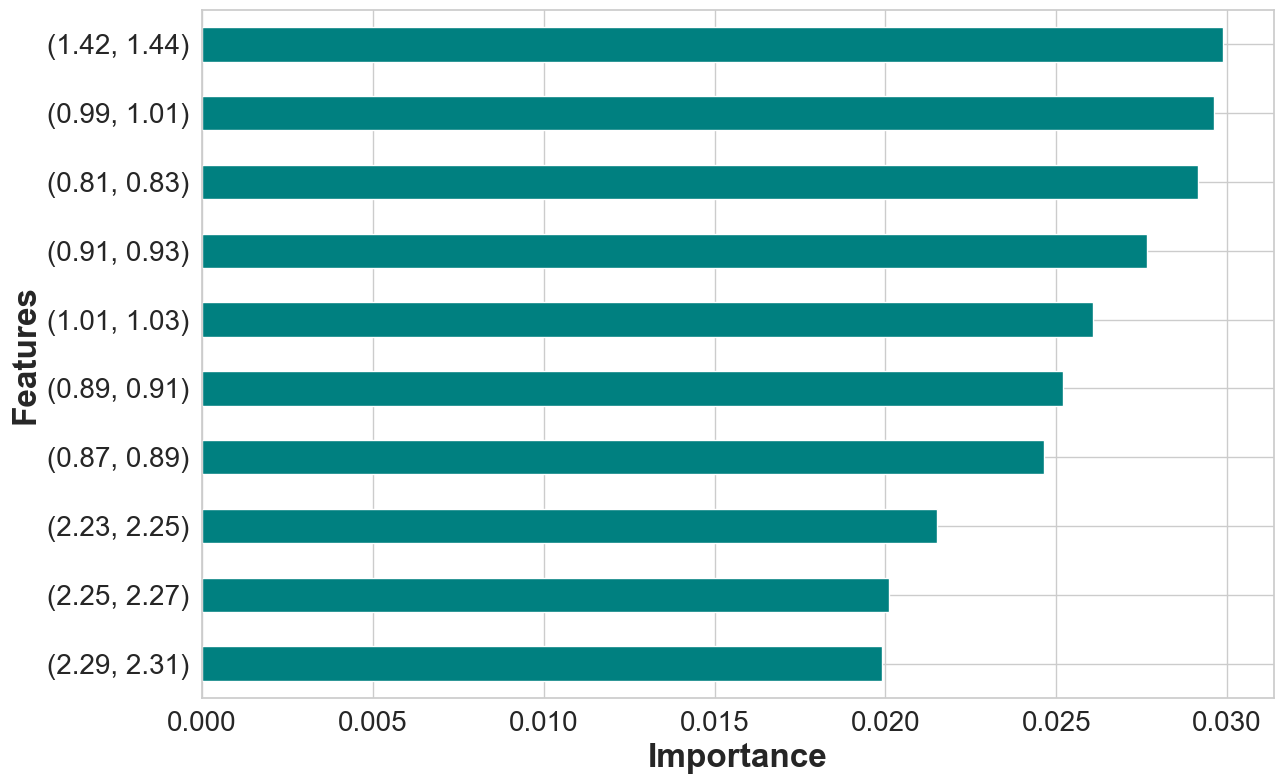

<Figure size 1300x800 with 0 Axes>

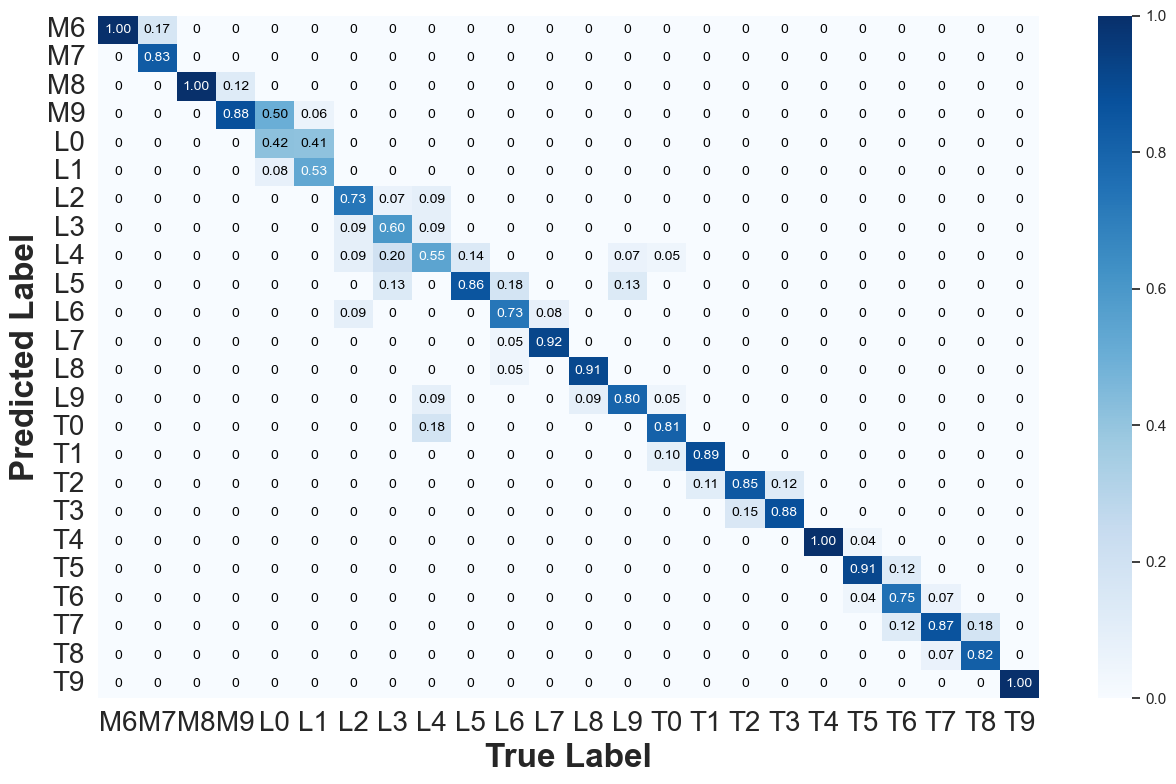

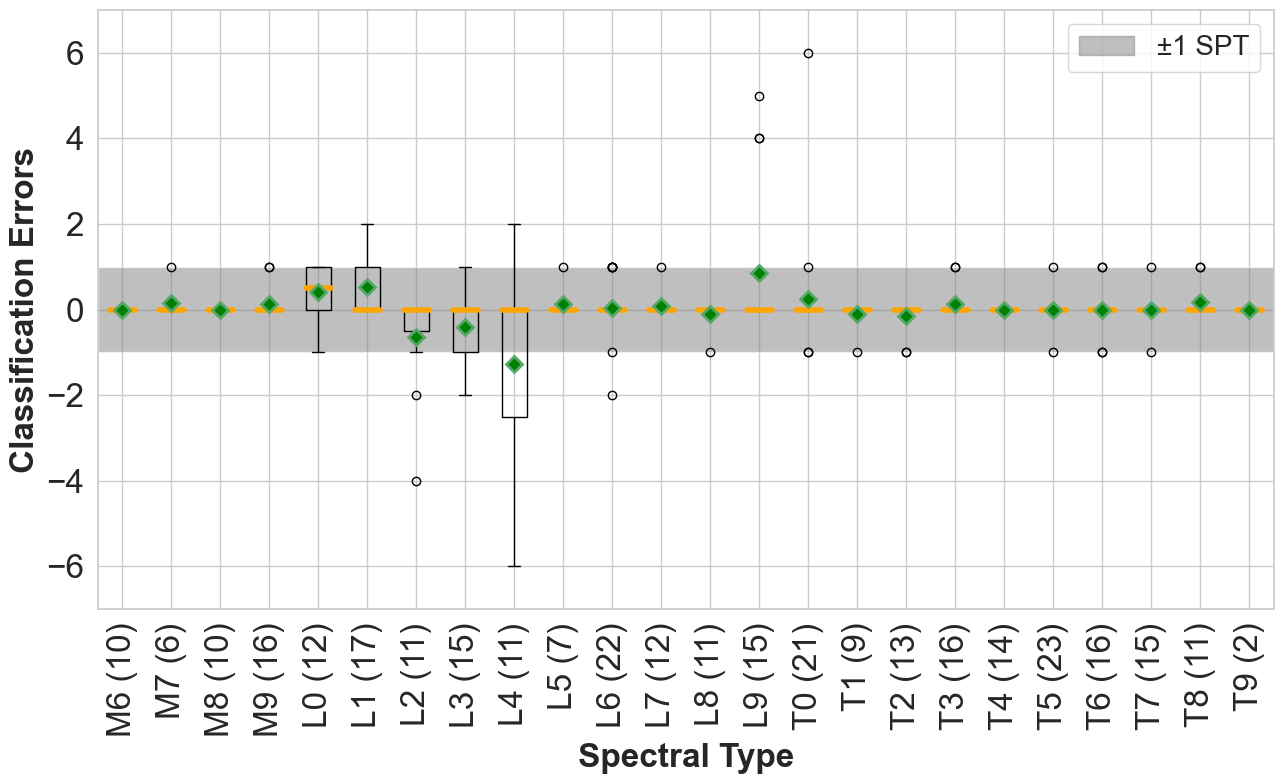

<Figure size 1300x800 with 0 Axes>

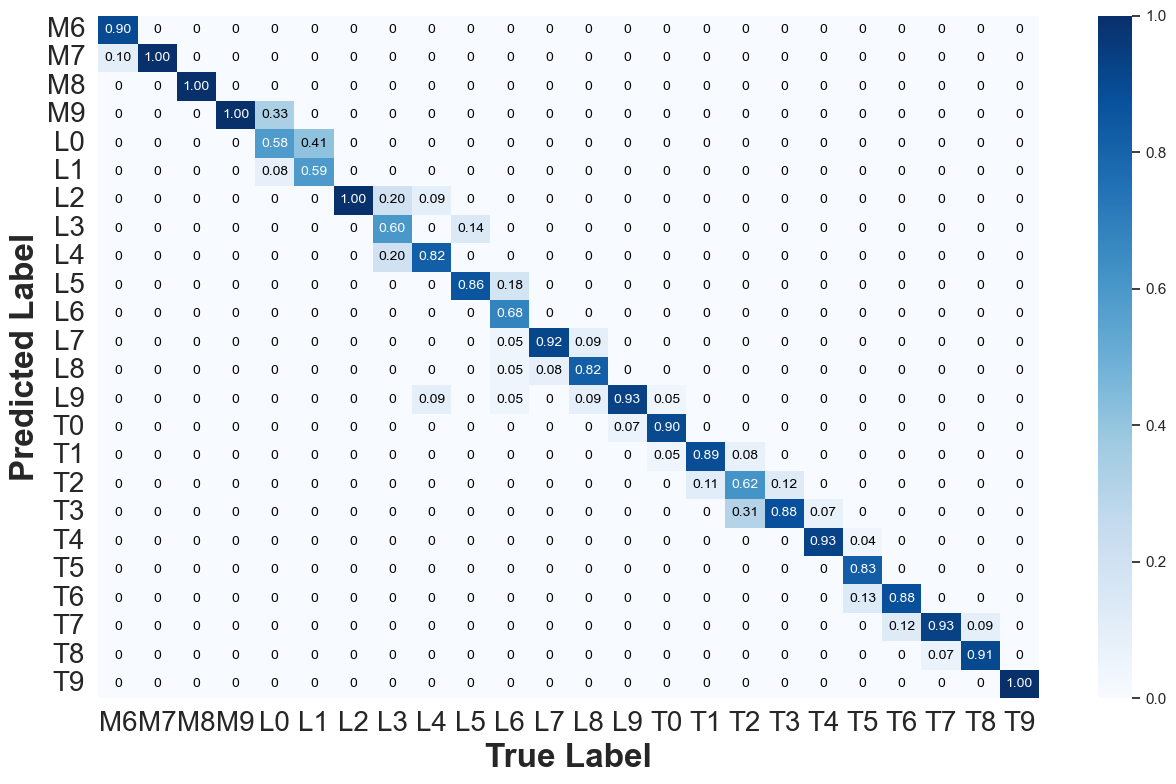

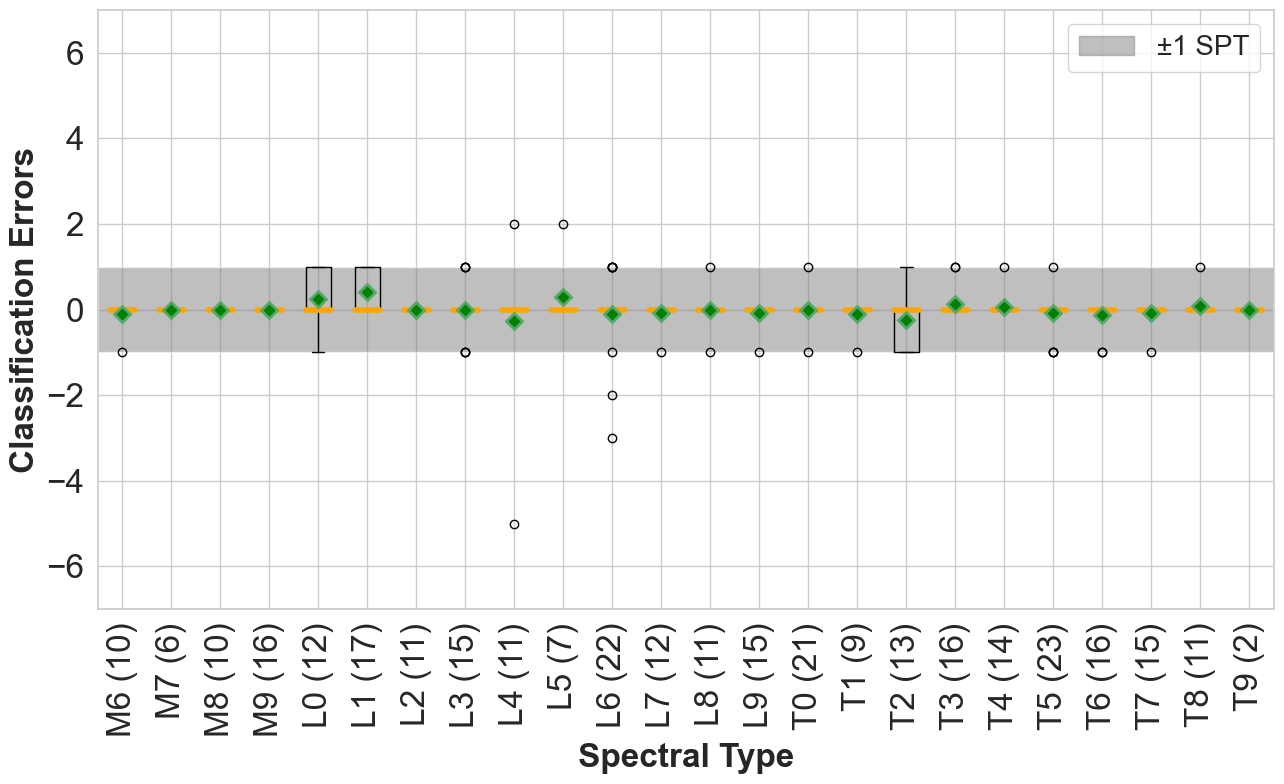

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}

spectral_types = [
               'M6', 'M7', 'M8', 'M9', 'L0', 'L1',
               'L2', 'L3', 'L4', 'L5', 'L6', 'L7',
               'L8', 'L9', 'T0', 'T1', 'T2', 'T3',
               'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

test_labels = np.unique(test_y)
legend_patch = Patch(color='grey', alpha=0.5, label='±1 SPT')
# Remove labels not in the test set from spectral_types
spectral_types = [label for label in spectral_types if label in test_labels]

# Convert the actual and predicted spectra to integers
test_y_int = np.array([type_to_int[s] for s in test_y])
y_pred_int_knn = np.array([type_to_int[s] for s in Y_pred])
y_pred_int_rf = np.array([type_to_int[s] for s in y_preds])

# Collect the errors for each subtype and count the number of objects in each subtype
errors_list_knn = []
errors_list_rf = []
subtype_counts = []
for i, s in enumerate(spectral_types):
    indices = np.where(test_y_int == type_to_int[s])[0]
    if len(indices) > 0:
        errors_knn = test_y_int[indices] - y_pred_int_knn[indices]
        errors_rf = test_y_int[indices] - y_pred_int_rf[indices]
        errors_list_knn.append(errors_knn)
        errors_list_rf.append(errors_rf)
        subtype_counts.append(len(indices))
    else:
        errors_list_knn.append(np.array([]))
        errors_list_rf.append(np.array([]))
        subtype_counts.append(0)

# Update the labels with the number of objects in each subtype
updated_labels = [f"{s} ({count})" for s, count in zip(spectral_types, subtype_counts)]

feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=False)
selected_features_spectral = feature_scores.head(10).iloc[::-1]

# Function to format the annotations
def format_ratio(val):
    if val == 0:
        return '0'
    else:
        return f"{val:.2f}"
    
def plot_flipped_confusion_matrix(cm, labels):
    # Transpose the confusion matrix for plotting
    cm_transposed = cm.T

    # Calculate the ratio based on the transposed matrix
    cm_ratio = cm_transposed / cm_transposed.sum(axis=0)

    # Create a new figure for the plot
    fig, ax = plt.subplots(figsize=(13, 8))

    # Create the heatmap with colorbar enabled
    sns_heatmap = sns.heatmap(cm_ratio, annot=False, cmap='Blues', ax=ax, cbar=True,
                              xticklabels=labels, yticklabels=labels, fmt='.2f')

    # Manually set the annotations
    for i in range(cm_ratio.shape[0]):
        for j in range(cm_ratio.shape[1]):
            text_value = cm_ratio[i, j]
            if text_value == 0:
                text = '0'  # Display '0' for zero values
            else:
                text = f'{text_value:.2f}'  # Display two decimal places for non-zero values
            color = 'white' if text_value > 0.5 else 'black'  # Adjust the threshold as needed
            ax.text(j + 0.5, i + 0.5, text, fontsize=10, ha='center', va='center', color=color)

    # Set labels and title
    plt.ylabel('Predicted Label', fontsize=24, fontweight='bold')
    plt.xlabel('True Label', fontsize=24, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=20)
    ax.set_yticklabels(labels, rotation=360)  # Set rotation angle
    plt.tight_layout()
    # Display the plot
    #plt.show()

def plot_box_plot(data, xlabel, ylabel, tick_labels):
    plt.figure(figsize=(13, 8))
    boxplot_dict = plt.boxplot(data, showmeans=True)
    # Customize median line (orange triangle) properties
    for median in boxplot_dict['medians']:
        median.set_color('orange')
        median.set_linewidth(4)  # Increase the line width

    # Customize mean line (green line) properties
    for mean in boxplot_dict['means']:
        mean.set_marker('D')  # Diamond shape, can be changed as needed
        mean.set_markerfacecolor('green')
        mean.set_markersize(8)  # Increase the marker size
        mean.set_markeredgewidth(2)  # Increase the edge width of the marker

    plt.xticks(ticks=np.arange(1, len(tick_labels) + 1), labels=tick_labels, rotation=90, fontsize=24)
    plt.yticks(fontsize=24)  # Increase y-axis label size
    plt.ylim(-7, 7)
    plt.xlabel(xlabel, fontsize=24, fontweight='bold')
    plt.ylabel(ylabel, fontsize=24, fontweight='bold')
    plt.axhspan(-1, 1, facecolor='grey', alpha=0.5)
    plt.legend(handles=[legend_patch], fontsize=20)
    plt.tight_layout()
    #plt.savefig(f"{title}.pdf")  # Save as PDF
    #plt.show()
    
cm_rf = confusion_matrix(test_y, y_preds, labels=spectral_types)

# 1. RF Feature Importance
plt.figure(figsize=(13, 8))
selected_features_spectral.plot(kind='barh', color='teal')
#plt.title('RF Feature Importance', fontsize=24, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Features', fontsize=24, fontweight='bold')
plt.xlabel('Importance', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.savefig('Top 10 rf_feature_importance.pdf')
plt.show()

# 2. RF Confusion Matrix
plt.figure(figsize=(13, 8))
# Usage with your confusion matrix data
plot_flipped_confusion_matrix(cm_rf, spectral_types)
plt.savefig('RF Confusion Matrix.pdf')
plt.show()
#RF Confusion Matrix (94.92%)
# 3. RF Classification Error Distribution
plot_box_plot(errors_list_rf, 'Spectral Type', 'Classification Errors', updated_labels)
plt.savefig('RF Classification Error Distribution.pdf')
plt.show()
# 4. kNN Confusion Matrix
cm_knn_subplot = confusion_matrix(test_y, Y_pred, labels=spectral_types)
plt.figure(figsize=(13, 8))
plot_flipped_confusion_matrix(cm_knn_subplot, spectral_types)
plt.savefig('kNN Confusion Matrix.pdf')
plt.show()
# (98.41%)
# 5. kNN Classification Error Distribution
plot_box_plot(errors_list_knn, 'Spectral Type', 'Classification Errors', updated_labels)
plt.savefig('kNN Classification Error Distribution.pdf')
plt.show()